In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(1234)
np.random.seed(1234)

# Regression task

### Generate a dataset for a regression task

In [23]:
# Set random seed for reproducibility
np.random.seed(1234)
torch.manual_seed(1234)

# Define number of samples and features
num_samples = 1100
num_features = 500

# Generate input data
X = np.random.normal(size=(num_samples, num_features))

# Generate target data
n=X.shape[1]
B = np.random.randn(n).reshape(-1,1)
B = B/np.linalg.norm(B)
y = X@B + np.random.normal(loc=0.0,scale=0.5,size=(num_samples, 1))

### Define the  Linear Regression model

### Train and evaluate the model with varying the sample size

In [24]:
class LinearRegression:
  '''
  In this class we are trying to implement the a linear regression model.
  The input X has a shape NxD
  the target y: Nx1
  the weight w: Dx1
  '''
  def __init__(self, X,y,lr,epochs):
    self.X = X
    self.y = y
    self.w = np.zeros((self.X.shape[1],1))
    self.lr = lr
    self.epochs = epochs

  def compute_mse(self,y_true, y_pred):
    m = len(y_true)
    loss = (1/m)*np.sum((y_true-y_pred)**2)
    # loss = np.mean((y_true-y_pred)**2)
    return loss

  def predict(self,x):
    y_pred = x@self.w
    return y_pred

  def fit(self,X,y):
    
    train_losses = []
    test_losses = []
    sample_size = len(X)
    sample_sizes = range(10, sample_size+1,100)

    for size in sample_sizes:
        # Split data into training and test sets
        np.random.seed(1234)
        train_size = 0.8
        n = int(size*train_size)
        indices = np.arange(size)
        np.random.shuffle(indices)
        train_idx = indices[: n]
        test_idx = indices[n:]
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        for epoch in range(1,self.epochs+1):
          ypred = self.predict(X_train)
          #compute the gradient
          dw = -(1/len(X_train))*2* X_train.T@(y_train-ypred)
          #update the weights
          self.w -= self.lr*dw
          #compute train and test losses
          test_pred = self.predict(X_test)
          train_loss = self.compute_mse(y_train, ypred)
          test_loss = self.compute_mse(y_test, test_pred)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return sample_sizes,train_losses, test_losses

In [25]:
lr=0.01
epochs = 1000
model = LinearRegression(X,y,lr,epochs)
sample_sizes,train_losses, test_losses=model.fit(X,y)

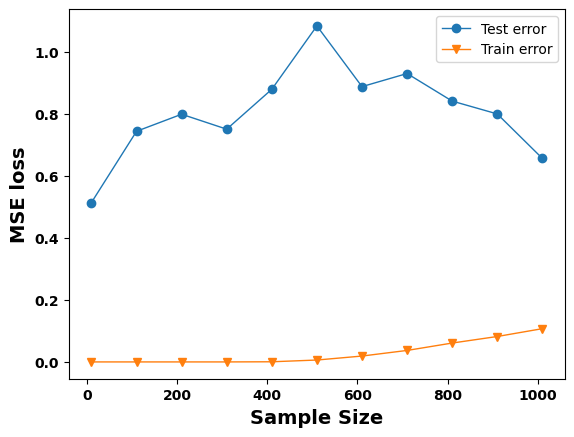

In [29]:
plt.plot(sample_sizes, test_losses, '-o',label='Test error',lw=1)
plt.plot(sample_sizes, train_losses,'-v', label='Train error',lw=1)
# plt.title(" Loss vs Sample Size")
plt.xlabel("Sample Size",fontsize=14,weight = 'bold')
plt.ylabel("MSE loss",fontsize=14,weight = 'bold')
plt.legend()
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

### Train and evaluate the model with varying its complexity

In [3]:
class LinearRegression:
  '''
  In this class we are trying to implement the a linear regression model.
  The input X has a shape NxD
  the target y: Nx1
  the weight w: Dx1
  '''
  def __init__(self, X,y,lr,epochs):
    self.X = X
    self.y = y
    self.lr = lr
    self.epochs = epochs

  def compute_mse(self,y_true, y_pred):
    loss = np.mean((y_true-y_pred)**2)
    return loss

  def predict(self,x):
    y_pred = x@self.w
    return y_pred

  def fit(self,X,y):
    
    train_losses = []
    test_losses = []
    sample_size = X.shape[1]
    num_features = range(1, sample_size+1,100)

    # Split data into training and testing sets
    np.random.seed(1234)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    for n in num_features:
        
        self.w = np.zeros((X_train[:,:n].shape[1],1))

        for epoch in range(1,self.epochs+1):
          ypred = self.predict(X_train[:,:n])
          #compute the gradient
          dw = -(1/len(X_train[:,:n]))*2* X_train[:,:n].T@(y_train-ypred)
          #update the weights
          self.w -= self.lr*dw
          #compute train and test losses
          test_pred = self.predict(X_test[:,:n])
          train_loss = self.compute_mse(y_train, ypred)
          test_loss = self.compute_mse(y_test, test_pred)

        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return num_features,train_losses, test_losses

In [4]:
# Set random seed for reproducibility
np.random.seed(1234)
torch.manual_seed(1234)

# Define number of samples and features
num_samples = 500
num_features = 1100

# Generate input data
XX = np.random.normal(size=(num_samples, num_features))

# Generate target data
n=XX.shape[1]
B = np.random.randn(n).reshape(-1,1)
B = B/np.linalg.norm(B)
yy = XX@B + np.random.normal(loc=0.0,scale=0.5,size=(num_samples, 1))
 

lr=0.01
epochs = 1000
model = LinearRegression(XX,yy,lr,epochs)
num_features,train_losses, test_losses=model.fit(XX,yy)

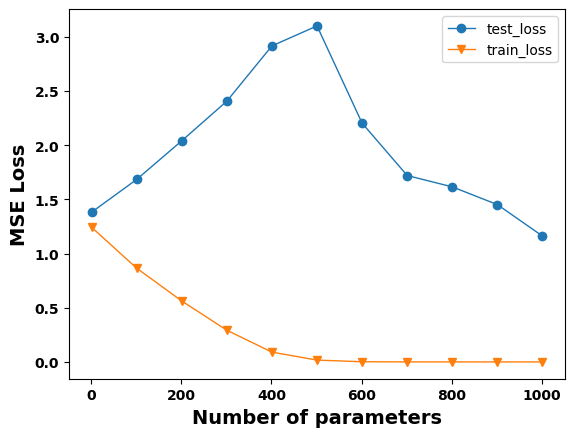

In [22]:
# Plot results
plt.plot(num_features, test_losses,'-o', label="test_loss",lw=1)
plt.plot(num_features, train_losses, '-v',label="train_loss",lw=1)

plt.xlabel("Number of parameters", fontsize=14,weight = 'bold')
plt.ylabel("MSE Loss",fontsize=14,weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.legend()
plt.show()